### 2.1 Please briefly describe your approach & 2.2 How did you define what “top” is

First, I want to define what the "top" and then describe my approach to solve the problem. Based on the data we have, finding top words could be translated to find the popular opinions/meanings/topics inside all the comments (data). Therefore, I define "top words" as the words can represent the popular meanings of the contents in the dataset. After defining the "top" meaning, the approach to solve this becomes a little clear - I want to use **topic modeling techniques** to extract the 10 topics and find the top non-duplicate words for each of the topic, which will give the information we want - the popular opinions/meanings/topics. 

In [1]:
# import lib and support functions
import pandas as pd
import re
import nltk

from utils.remove_lemmanization import RemoveUrlEmojiLemmanization
from utils.remove_stopwords import StopwordsRemove
from utils.topic_model import TopicModel

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [2]:
# Load stopwords 
nltk.download('stopwords')
custom_stopwords = ['rt',
                        '#heat', 'heat', '#wave', 'wave', '#heatwave', 'heatwave', 'heatwave2022',
                        '#california', 'california',
                        '#californiaheatwave', 'californiaheatwave',
                        'sfchronicle', '2022',
                        '\n', '\n\n', '&', ' ', '.', '-', 'got',
                        "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'use',
                        'like', '$', '@']


df = pd.read_csv('./NewsArticles_Top10Keywords.csv', header=0)

text = df['content']

# Preprocess data to same format and remove stopwords
rm_lemma = RemoveUrlEmojiLemmanization(data=text)
text = rm_lemma.preprocess_text(convertTostring=False)

rm_stop = StopwordsRemove(custom_stopwords=custom_stopwords)
text = rm_stop.rm_stopwords(text, tokenizer_flag=False)

text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/linhanyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['guest',
  'slack',
  'burst',
  'workplace',
  'scene',
  'employee',
  'rejoice',
  'finally',
  'way',
  'chat',
  'send',
  'dreaded',
  'email',
  'bad',
  'actually',
  'chat',
  'coworker',
  'face',
  'face',
  'thank',
  'slack',
  'handful',
  'messaging',
  'platform',
  'business',
  'easily',
  'communicate',
  'team'],
 ['barcelona',
  'base',
  'social',
  'advertising',
  'company',
  'adsmurai',
  'receive',
  'million',
  '4.2',
  'million',
  'second',
  'round',
  'funding',
  'lead',
  'venture',
  'capital',
  'firm',
  'axon',
  'partner',
  'group',
  'participation',
  'banc',
  'sabadell',
  'program',
  'bstartup10',
  'enisa',
  'spanish',
  'government',
  'fund',
  'financing',
  'group',
  'launch',
  '2014',
  'marc',
  'elena',
  'otto',
  'wust',
  'juan',
  'antonio',
  'robles',
  'adsmurai',
  'specialize'],
 ['wager',
  'people',
  'buy',
  'htc',
  'vive',
  'love',
  'unit',
  'wish',
  'new',
  'version',
  'bring',
  'key',
  'improvement',
 

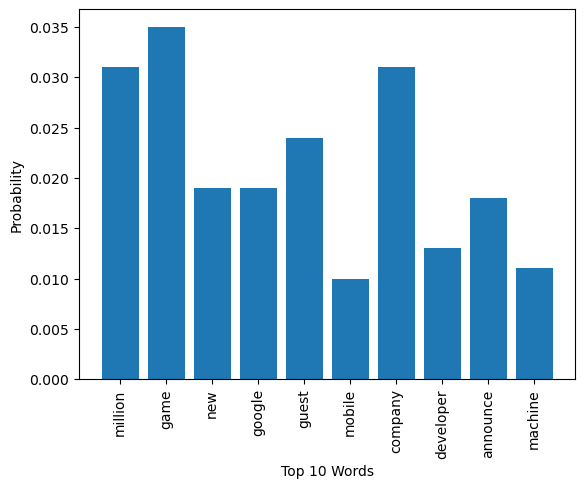

In [3]:
NUM_TOPICS = 10
lda = TopicModel(text=text)
topic_contents = lda.fit_transform(num_topics=NUM_TOPICS)
topic_words = lda.topic_word_dist(print_formatted=True)

In [4]:
# In case you are interested in the topics, I print them out as below
topic_words

[['topic 0', 'game', 'new', 'today', 'company', 'announce'],
 ['topic 1', 'game', 'new', 'nintendo', 'developer', 'year'],
 ['topic 2', 'company', 'million', 'announce', 'venture', 'today'],
 ['topic 3', 'new', 'million', 'fund', 'samsung', 'announce'],
 ['topic 4', 'game', 'war', 'today', 'world', 'new'],
 ['topic 5', 'today', 'google', 'new', 'company', 'microsoft'],
 ['topic 6', 'apple', 'new', 'guest', 'year', 'iphone'],
 ['topic 7', 'company', 'billion', 'year', 'percent', 'million'],
 ['topic 8', 'guest', 'technology', 'intelligence', 'artificial', 'company'],
 ['topic 9', 'game', 'come', 'year', 'new', 'playstation']]

### 2.4 Skip
### 2.5 If you had a few weeks (say 4-8) to do this task, what other approaches would you try and implement for this problem?
If I have more time to solve this problem, I will explore more options. During the implementation of the topic modeling method, I notice that LDA may output different topic distributions when you train the model multiple times. In order to overcome this drawback, there are two ways I want to try if I have more time. <br>
First, I would train multiple LDA models and average the probability of the words distribution. The second way, I would switch to use LSA for topic modeling, which will provide more consistent results about the words distribution. <br>
Also, when I have more time for this task, I want to try to conventional methods like TF-IDF and BM25 to have a quick check and validation the current result. Then I would like to try TextRank, a graph based ranking algorithm using PageRank, to calculate the importance of the words then select the top ones. After trying all these methods, I will compare the results and see whether these are any big difference. If so, I will take a close look at the model or models having the biggest different among others. If not, I will start to dive deeper and see if there are any rooms for me to optimize the existing models or algorithms. <br>
Overall, there are still many methods and thoughts for this task to try and implement in the future. 